## *Задача 1. Генераторы разреженных матриц* 


Реализовать с помощью scipy генератор полосатых матриц, который должен поддерживать функции:
* Генерация абсолютно случайной полосатой матрицы $n\times m$
* Генерация полосатой матрицы с постоянными коэффициентами вдоль каждой полосы $n\times n$
* Генерация случайного возмущения матрицы $n\times m$, каждый элемент которой не превосходит по модулю заданный $\varepsilon$
* Генерация полосатой матрицы, в которой полосы заданы векторами.

 Сравнить три приведённых ниже метода создания матриц между собой по использованию памяти, используя измерение размера объектов в Python (sys.getsizeof(object[, default])). 
 Реализовать генератор матриц всеми тремя методами, сравнить их также по скорости (для решения систем уравнений).

Для повышения производительности можно использовать sparse.linalg.splu(A).solve(b) , который использует LU-декомпозицию, после чего объект SuperLU  имеет свой собственный метод solve.

Реализуйте генератор матриц, используя этот метод. 
https://docs.scipy.org/doc/scipy/reference/sparse.linalg.html#module-scipy.sparse.linalg   

Убедитесь измерением времени работы, что он работает быстрее. Однако третий метод считается самым предпочтительным. Найдите, в чём недостаток предложенного метода, и покажите его с помощью измерений.

Для измерений можно использовать 

https://docs.python.org/3/library/resource.html#resource-usage  

In [16]:
import sys as ss
import time
from scipy import sparse
from scipy import linalg
import numpy as np

start = time.time()

for i in range(100):
    N = 10
    m = 3
    Ap, As, An, Aw, Ae = np.ones(N), np.ones(N), np.ones(N), np.ones(N), np.ones(N)
    diagonals = [Ap, As, An, Aw, Ae]
    A = scipy.sparse.diags(diagonals, [0, -1, 1, -m, m]).toarray()
    b= np.random.rand(N)
    x = linalg.solve(A, b)

end = time.time()

t = (end - start)/(i+1)

print(A, '\n', x,'\n', t, 'сек')

[[1. 1. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 1. 1. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 1. 1. 0. 1. 0. 0. 0. 0.]
 [1. 0. 1. 1. 1. 0. 1. 0. 0. 0.]
 [0. 1. 0. 1. 1. 1. 0. 1. 0. 0.]
 [0. 0. 1. 0. 1. 1. 1. 0. 1. 0.]
 [0. 0. 0. 1. 0. 1. 1. 1. 0. 1.]
 [0. 0. 0. 0. 1. 0. 1. 1. 1. 0.]
 [0. 0. 0. 0. 0. 1. 0. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 1. 0. 1. 1.]] 
 [-0.18511286  0.20511783  0.12046417  0.13900699  0.10775401 -0.26719504
  0.18730185  0.35470162  0.01255415  0.12938115] 
 0.0003989386558532715 сек


In [4]:
import sys as ss
from scipy import sparse
from scipy import linalg
import numpy as np

start = time.time()

for i in range(100):
    N = 10 
    m = 3
    Ap, As, An, Aw, Ae = np.ones(N), np.ones(N), np.ones(N), np.ones(N), np.ones(N)
    A = np.zeros((2 * m + 1, N))
    A[0] = Ae
    A[m - 1] = An
    A[m] = Ap
    A[m + 1] = As
    A[2 * m] = Aw
    b= np.random.rand(N)
    x = linalg.solve_banded((m, m), A, b)

end = time.time()

t = (end - start)/(i+1)
    
print(A, x, sep = '\n')
print(t, 'сек')

[[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]]
[-0.43831248  0.86317071  0.49707097 -0.15412551 -0.26698278 -0.61924174
  0.5302724   0.65172388 -0.02269906  0.01897426]
3.987789154052734e-05 сек


In [5]:
import sys as ss
import scipy
import time
import numpy as np
from scipy.sparse.linalg import spsolve

start = time.time()

for i in range(100):
    N = 10
    m = 3
    Ap, As, An, Aw, Ae = np.ones(N), np.ones(N), np.ones(N), np.ones(N), np.ones(N)
    diagonals = [Ap, As, An, Aw, Ae]
    A = scipy.sparse.diags(diagonals, [0, -1, 1, -m, m])
    x = spsolve(A,b)
    
end = time.time()

t = (end - start)/(i+1)

print(A, x, sep = '\n')
print(t, 'сек')

  (0, 0)	1.0
  (1, 1)	1.0
  (2, 2)	1.0
  (3, 3)	1.0
  (4, 4)	1.0
  (5, 5)	1.0
  (6, 6)	1.0
  (7, 7)	1.0
  (8, 8)	1.0
  (9, 9)	1.0
  (1, 0)	1.0
  (2, 1)	1.0
  (3, 2)	1.0
  (4, 3)	1.0
  (5, 4)	1.0
  (6, 5)	1.0
  (7, 6)	1.0
  (8, 7)	1.0
  (9, 8)	1.0
  (0, 1)	1.0
  (1, 2)	1.0
  (2, 3)	1.0
  (3, 4)	1.0
  (4, 5)	1.0
  (5, 6)	1.0
  (6, 7)	1.0
  (7, 8)	1.0
  (8, 9)	1.0
  (3, 0)	1.0
  (4, 1)	1.0
  (5, 2)	1.0
  (6, 3)	1.0
  (7, 4)	1.0
  (8, 5)	1.0
  (9, 6)	1.0
  (0, 3)	1.0
  (1, 4)	1.0
  (2, 5)	1.0
  (3, 6)	1.0
  (4, 7)	1.0
  (5, 8)	1.0
  (6, 9)	1.0
[-0.43831248  0.86317071  0.49707097 -0.15412551 -0.26698278 -0.61924174
  0.5302724   0.65172388 -0.02269906  0.01897426]
0.00030916929244995117 сек


C:\My_place\Anaconda\lib\site-packages\scipy\sparse\linalg\dsolve\linsolve.py:144: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  warn('spsolve requires A be CSC or CSR matrix format',


# Задача 2. Метод Якоби.


Реализуйте метод итераций для решения системы линейных уравнений (метод Якоби). Для этого перепишите уравнение $A x=b$, выделив диагональную часть матрицы $A$ :

$$
A=D+(A-D),
$$

в виде

$$
x_{n+1}=B x_n+c,
$$

где $B=D^{-1}(D-A)$. Найдите $c$.
Создайте случайную матрицу с диагональным доминированием. 



In [6]:
import numpy as np
from numpy import linalg as LA
rnd = np.random. RandomState(1234)
n=10
D = np.diag([15]*n)
A = rnd.uniform (size=(n,n))+D
b = rnd.uniform (size=n)

B = np.linalg.inv(D)*(D-A)
x0 = np.ones(10)

def Jacobi(A,b,x_0,n):
    x=x0
    y=x0
    k=0
    key_value=[x]
    while(k<21):
        for i in range(n):
            sum_value=0
            for j in range(n):
                if j!=i:
                    sum_value = sum_value + A[i][j]*x[j]
            y[i]=(b[i] - sum_value)/A[i][i]

        x=y.copy()
        k=k+1
        key_value.append(x)

    return x,key_value

ans = Jacobi(A,b,x0,10)[1]

print('\n', ans)

answer = ans[21]
print('\n', answer, '\n')


A @ answer - b


 [array([ 0.03919429,  0.03780037,  0.04283232,  0.02365951,  0.05745031,
       -0.00030244, -0.00577279,  0.03177549, -0.00422849,  0.05284648]), array([-0.33196517, -0.23695466, -0.19637262, -0.18468356, -0.05177458,
       -0.19235895, -0.05130398,  0.06373239,  0.01998253,  0.09645048]), array([0.07226371, 0.07381559, 0.08056384, 0.07494114, 0.07548926,
       0.02226711, 0.02304095, 0.08160905, 0.04531461, 0.09645048]), array([ 0.02385628,  0.02583526,  0.0311645 ,  0.00931226,  0.04946435,
       -0.01366703, -0.01408314,  0.02413284, -0.01710875,  0.04178232]), array([ 0.04341698,  0.0415518 ,  0.04642124,  0.02812286,  0.05969128,
        0.00320912, -0.00354431,  0.03474427, -0.0004701 ,  0.05609904]), array([ 0.0379066 ,  0.03671123,  0.04176174,  0.02233288,  0.05676821,
       -0.00137594, -0.00648168,  0.03093251, -0.00537301,  0.0518507 ]), array([ 3.95796021e-02,  3.81309650e-02,  4.31533689e-02,  2.40580869e-02,
        5.76541283e-02,  1.95877145e-05, -5.56397837e-03

array([-1.08685283e-10, -9.48933154e-11, -8.98690011e-11, -1.12018061e-10,
       -5.90474336e-11, -9.50522161e-11, -6.01029712e-11, -7.35057570e-11,
       -9.93435473e-11, -8.63804583e-11])

Вычислите норму соотвутствующей матрицы $B$ и выполните итерации Якоби. Убедитесь, что результирующий вектор $x$ действительно решает исходную систему.

Матрица $A$, с которой вы работали выше, по построению доминируется диагональю. Что произойдёт, если уменьшать величину диагональных элементов? Проверьте сходимость итераций Якоби (вычислите также норму матрицы $B$ ). 

# Задача 3. Метод вращений и QR-разложение.

После первой стадии метода вращений Гивенса система имеет вид 

\begin{aligned}
&a_{11}^{(n-1)} x_1+a_{12}^{(n-1)} x_2+a_{13}^{(n-1)} x_3+\ldots+a_{1 n}^{(n-1)} x_n=b_1^{(n-1)}\\
&a_{22}^{(1)} x_2+a_{23}^{(1)} x_3+\ldots+a_{2 n}^{(1)} x_n=b_2^{(1)} \text {, }\\
\ldots\\
&a_{n 2}^{(1)} x_2+a_{n 3}^{(1)} x_3+\ldots+a_{n n}^{(1)} x_n=b_n^{(1)} .
\end{aligned} 

Доказать следующие формулы: 
$$
\begin{aligned}
&a_{1 j}^{(l-1)}=c_{1 l} a_{1 j}^{(l-2)}+s_{1 l} a_{l j}, \quad a_{l j}^{(1)}=-s_{1 l} a_{1 j}^{(l-2)}+c_{1 l} a_{l j}, \quad a_{1 j}^{(0)}=a_{1 j},\\
&\begin{aligned}
& j=1,2, \ldots, n, \\
b_1^{(l-1)}=c_{1 l} b_1^{(l-2)}+s_{1 l} b_l, \quad \quad b_l^{(1)}=&-s_{1 l} b_1^{(l-2)}+c_{1 l} b_l, \\
l=2,3, \ldots, n,
\end{aligned}\\
&c_{1 l}=\frac{a_{11}^{(l-2)}}{\sqrt{\left(a_{11}^{(l-2)}\right)^2+a_{l 1}^2}}, \quad s_{1 l}=\frac{a_{l 1}}{\sqrt{\left(a_{11}^{(l-2)}\right)^2+a_{l 1}^2}},
\\
& l=2,3, \ldots, n,\\
\end{aligned}
$$

После второй стадии метода вращения Гивенса система уравнений имеет вид:

\begin{aligned}
&a_{11}^{(n-1)} x_1+a_{12}^{(n-1)} x_2+a_{13}^{(n-1)} x_3+\ldots+a_{1 n}^{(n-1)} x_n=b_1^{(n-1)}\\
&a_{22}^{(n-1)} x_2+a_{23}^{(n-1)} x_3+\ldots+a_{2 n}^{(n-1)} x_n=b_2^{(n-1)} \text {, }\\
&a_{33}^{(2)} x_3+\ldots+a_{3 n}^{(2)} x_n=b_3^{(2)} \text {, }\\
\ldots \\
&a_{n 3}^{(2)} x_3+\ldots+a_{n n}^{(2)} x_n=b_n^{(2)}
\end{aligned}  

Доказать следующие формулы 
$$
\begin{aligned}
&a_{2 j}^{(l-1)}=c_{2 l} a_{2 j}^{(l-2)}+s_{2 l} a_{l j}^{(1)}, \quad a_{l j}^{(2)}=-s_{2 l} a_{2 j}^{(l-2)}+c_{2 l} a_{l j}^{(1)} \text {, }\\
&j=2,3, \ldots, n\\
&\begin{aligned}
b_2^{(l-1)}=c_{2 l} b_2^{(l-2)}+s_{2 l} b_l^{(1)}, \quad \quad b_l^{(2)}=&-s_{2 l} b_2^{(l-2)}+c_{2 l} b_l^{(1)}, \\
& l=3,4, \ldots, n,
\end{aligned}\\
&c_{2 l}=\frac{a_{22}^{(l-2)}}{\sqrt{\left(a_{22}^{(l-2)}\right)^2+\left(a_{l 2}^{(1)}\right)^2}}, \quad s_{2 l}=\frac{a_{l 2}^{(1)}}{\sqrt{\left(a_{22}^{(l-2)}\right)^2+\left(a_{l 2}^{(1)}\right)^2}}
\end{aligned}  
$$

После (n-1) шагов метода Гивенса получаем систему:

\begin{aligned}
&a_{11}^{(n-1)} x_1+a_{12}^{(n-1)} x_2+a_{13}^{(n-1)} x_3+\ldots+a_{1 n}^{(n-1)} x_n=b_1^{(n-1)},\\
&a_{22}^{(n-1)} x_2+a_{23}^{(n-1)} x_3+\ldots+a_{2 n}^{(n-1)} x_n=b_2^{(n-1)} \text {, }\\
\ldots \\
&a_{n n}^{(n-1)} x_n=b_n^{(n-1)} \text {, }
\end{aligned}  




Где

\begin{aligned}
&a_{k j}^{(l-1)}=c_{k l} a_{k j}^{(l-2)}+s_{k l} a_{l j}^{(k-1)}, \quad a_{l j}^{(k)}=-s_{k l} a_{k j}^{(l-2)}+c_{k l} a_{l j}^{(k-1)}\\
&j=k, k+1, \ldots, n,\\
&b_k^{(l-1)}=c_{k l} b_k^{(l-2)}+s_{k l} b_l^{(k-1)}, \quad b_l^{(k)}=-s_{k l} b_k^{(l-2)}+c_{k l} b_l^{(k-1)} \text {, }\\
&k=1, \ldots, n, \quad l=k+1, \ldots, n
\end{aligned} 

а  
$$
c_{k l}=\frac{a_{k k}^{(l-2)}}{\sqrt{\left(a_{k k}^{(l-2)}\right)^2+\left(a_{l k}^{(k-1)}\right)^2}}, \quad s_{k l}=\frac{a_{l k}^{(k-1)}}{\sqrt{\left(a_{k k}^{(l-2)}\right)^2+\left(a_{l k}^{(k-1)}\right)^2}}
$$ 

Доказать, что метод Гивенса реализует QR-разложение матрицы.



$$
A=Q R,
$$
где $Q$ - ортогональная матрица, а $R-$ верхняя треугольная с положительными элементами на главной диагонали.

# Задача 4. Асимпотика метода Гивенса.

Покажите, что при больших n метод Гивенса требует
$$
\approx 4 n^3 / 3
$$
  действий умножения.  Докажите, что метод Гаусса требует примерно в 4 раза меньше.  

Примените и тот, и другой метод для решения систем уравнений, используя библиотечные функции, и продемонстрируйте эту разницу измерением времени работы.

.


In [15]:
import numpy as np
import time
import scipy.linalg as LA

rnd = np.random. RandomState (1234)
n=4000
A= rnd.uniform (size=(n,n))
b= rnd.uniform (size=n)


def Gauss(A, b):
    L, U = LA.lu(A, permute_l = True)
    x = np.linalg.solve(U, np.linalg.inv(L) @ b)
    return x

def Givence(A, b):
    Q, R = LA.qr(A)
    x = np.linalg.inv(R) @ Q.T @ b
    return x

start = time.time()
x1 = givence(A, b)
end = time.time()

t = (end - start)

print('Гивенс: ', t, '\n')

start = time.time()
x2 = gauss(A, b)
end = time.time()

t = (end - start)
print('Гаусс: ', t, '\n')

Гивенс:  5.212696552276611 

Гаусс:  2.6157522201538086 



# Задача 5. Уравнение Пуассона методом Зейделя.

In [20]:
import numpy as np
from scipy.linalg import block_diag

Рассмотрим систему линейных уравнений, матрица правой части которой является "ленточной" и имеет следующую структуру: ненулевые элементы расположены на трех центральных диагонялях и на двух "крыльях". Матрицы такой структуры возникают, например, при решении задачи на нахождение электростатического потенциала $\phi(x, y)$, создаваемого двумерным распределением заряда $\rho(x, y)$ при дискретизации на сетке уравнения Пуассона

$$
\Delta \phi=-4 \pi \rho .
$$

(детали см. напр. А.А. Самарский, А.В. Гулин, Численные методы, Ч. 3 гл. 1, параграф 1).
Размер матрицы растет с уменьшением шага сетки $h$ как $O\left(1 / h^2\right)$. Таким образом, приходится иметь дело с разреженными матрицами огромного размера.
Матрицу m создадим следующим образом:

In [21]:
n = 5

# Диагональный блок
a = np.zeros((n-1, n-1))

idx = np.arange(n-1)

a[idx, idx] = -4
a[idx[:-1], idx[:-1]+1] = 1
a[idx[1:], idx[1:]-1] = 1

# собираем блочно-диагональную `m`
m = block_diag(a, a, a, a, a)

# заполняем "крылья"
idx = np.arange(m.shape[0])

m[idx[:-n+1], idx[:-n+1] + n-1] = 1
m[idx[n-1:], idx[n-1:] - n+1] = 1

In [22]:
with np.printoptions(linewidth=99):
    print(m)

[[-4.  1.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 1. -4.  1.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1. -4.  1.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1. -4.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 1.  0.  0.  0. -4.  1.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  1. -4.  1.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.  1. -4.  1.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.  1. -4.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0. -4.  1.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.  0.  1. -4.  1.  0.  0.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  1.  0.  0.  1. -4.  1.  0.  0.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  1. -4.  0.  0.  0.  1.  0.  0.  0.  0.]
 [ 0

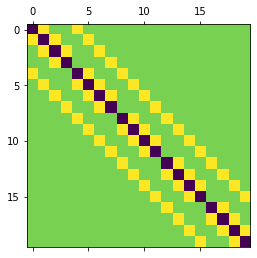

In [23]:
import matplotlib.pyplot as plt
plt.matshow(m)

Зададим вектор правой части системы 

In [24]:
b = np.zeros(m.shape[0])
b[m.shape[0]//2] = -1

Составить функцию, вычисляющую решение системы уравнений $m x=b$ методом Зейделя с заданной точностью $\epsilon$. Прокоментировать зависимость числа итераций, требуемых для достижения заданной точности, от $\epsilon$. 

In [29]:
import time
def zeidel(m, b, eps):
    start = time.time()
    x = np.zeros(len(m))
    iter = 1

    D = np.diag(m.diagonal())
    L = np.tril(m)-D
    U = np.triu(m)-D

    while(np.linalg.norm(m @ x - b) > eps):
        x = -np.linalg.inv(L + D) @ U @ x  + np.linalg.inv(L + D) @ b
        iter += 1
    end = time.time()
    t = end - start
    return x, iter, t


x, iter, t = zeidel(m, b, 0.001)

print('Решение: \n', x)
print('Итераций: ', iter)
print('Время: ', t)

Решение: 
 [0.02581072 0.05105345 0.06529589 0.03878406 0.05244542 0.11339011
 0.17154987 0.08991809 0.07088819 0.17883539 0.41781839 0.14941364
 0.05253826 0.11351592 0.17165523 0.08997263 0.02591961 0.05120101
 0.06541948 0.03884803]
Итераций:  19
Время:  0.0009958744049072266


# Задача 6. FAST PYTHON.

Изучите документ FastPython.ipynb .
Используя Numba, сделайте ускорение циклов в методе Зейделя в задаче 5.  Сравните время работы ускоренной и неускоренной программ. 